In [186]:
import sys
from graph_builder import bgraph
from MST import mst
from plot_clusters import pcluster
from sklearn.metrics.cluster import adjusted_rand_score

In [187]:
def prim_clustering(G, k):
    
    pred = mst.prim_algorithm(G)
        
    keys = list(pred.keys())
    edges = []
            
    for i in range(len(keys)):
        edges.append([G[keys[i]][pred[i+1]-1], i+1, pred[i+1]])
                                
    edges = sorted(edges, reverse=True)
    
    for j in range(k - 1):
        edges[j] = [0, edges[j][1], edges[j][1]]
    
    return edges

In [209]:
def kruskal_clustering(G, edges, k):
    
    edges = mst.kruskal_algorithm(G, edges)
        
    tam = len(edges) - 1
    aux = []
                
    for i in range(k - 1):
        
        edges[tam - i] = [0, edges[tam - i][1], edges[tam - i][1]]
        
    for i in range(len(edges)):
        aux.append(edges[tam - i][1])
        
    aux = set(sorted(aux))
        
    for i in range(1, len(G.keys())+1):
        if i not in aux:
            edges.append([0, i, i])
        
        
    return edges

In [210]:
def k_clustering(arq, k, mstree):
    
    G, ver, edges = bgraph.build_graph("in/" + arq)
    
    if(mstree == "prim"):
        edges = prim_clustering(G, k)
        
    elif(mstree == "kruskal"):
        edges = kruskal_clustering(G, edges, k)
        
    else:
        return "Choose a valid algorithm!"
    
    plot = pcluster(edges, ver)
    plot.show_clusters('cluster_' + str(mstree))

    pclasses = plot.classes_list()
    tclasses = bgraph.read_classes('in/classes.txt')
    
    print("Concordance " + mstree + ": " + str(adjusted_rand_score(tclasses, pclasses)))

788
Concordance kruskal: 0.8089434170360936


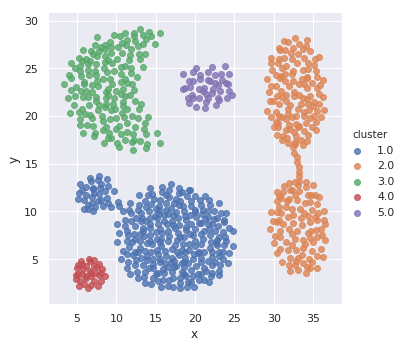

In [212]:
k_clustering("data.txt", 5, "kruskal")